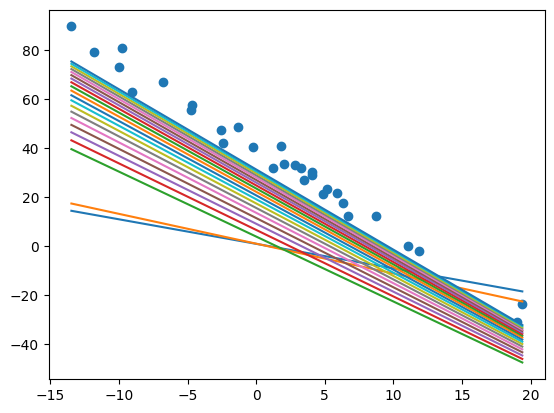

[np.float64(31.963575955076188), np.float64(-3.2838494186230753)]


In [138]:
import numpy as np
import matplotlib.pyplot as plt

## Our Data
n = 30

x = 10*np.random.randn(n)
y = -3.5*x + 40 + 4*np.random.randn(n)

T = [1,-1]
# y_pred = T[0] + T[1]*x

# plt.scatter(x,y)
x_line = np.linspace(x.min(),x.max(),10)
# plt.plot(x_line, T[0] + T[1]*x_line, color='red')
# plt.show()

def refine_reg(T,X,Y,lrate=0.01,update_T1=True):
    n = len(X)
    error = T[0] + T[1]*X - Y
    dE0 = 2 * np.sum(error) / n
    T[0] -= lrate * dE0
    if update_T1:
        dE1 = 2 * X.dot(error) / n
        T[1] -= lrate * dE1
    return T

plt.scatter(x,y)
# y_pred = T[0] + T[1]*x
y_line = T[0] + T[1]*x_line
plt.plot(x_line,y_line, label='Iter 0')

old_T1 = 0

for i in range(800):
    # if i < 10:
    #     print(old_T1,T[1])
    if (old_T1 - T[1]) < 0.0001:
        T = refine_reg(T,x,y,lrate=0.01,update_T1=False)
    else:
        old_T1 = T[1]
        T = refine_reg(T,x,y,lrate=0.001)
    y_line = T[0] + T[1]*x_line
    if i%40 == 0:
        plt.plot(x_line,y_line, label=f"Iter {i+1}")

# plt.xlim((0,0.6))
# plt.ylim((0.7,1.4))
# plt.legend()
plt.show()
print(T)

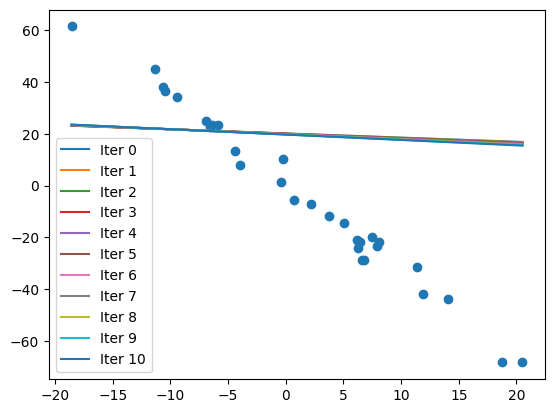

In [ ]:
def refine_reg(T,X,Y,lrate=0.01):
    n = len(X)
    error = T[0] + T[1]*X - Y
    dE0 = 2 * np.sum(error) / n
    dE1 = 2 * X.dot(error) / n
    T[0] -= lrate * dE0
    T[1] -= lrate * dE1
    return T

plt.scatter(x,y)
# y_pred = T[0] + T[1]*x
y_line = T[0] + T[1]*x_line
plt.plot(x_line,y_line, label='Iter 0')

for i in range(10):
    T = refine_reg(T,x,y,lrate=0.001)
    # y_pred = T[0] + T[1]*x
    y_line = T[0] + T[1]*x_line
    plt.plot(x_line,y_line, label=f"Iter {i+1}")

# plt.xlim((0,0.6))
# plt.ylim((0.7,1.4))
# plt.legend()
plt.show()

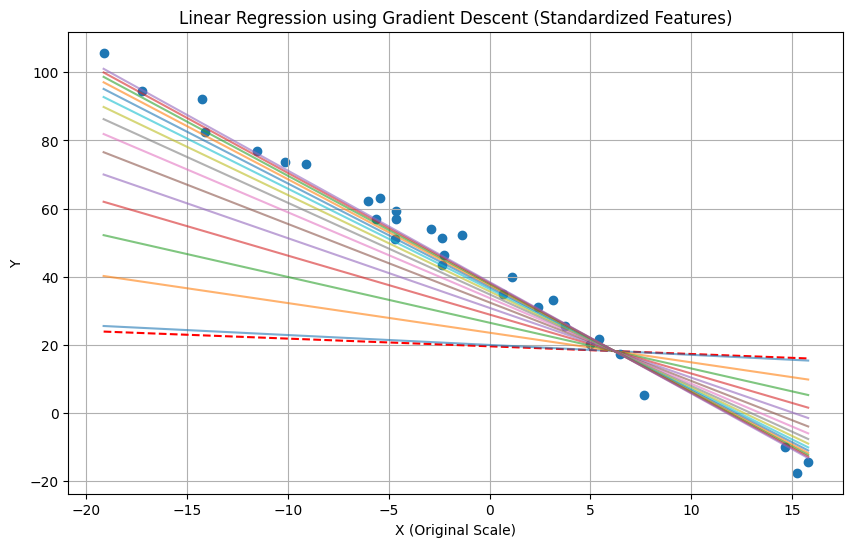

In [139]:
import numpy as np
import matplotlib.pyplot as plt

## Our Data
n = 30
np.random.seed(42) # Added for reproducible results

x = 10*np.random.randn(n)
y = -3.5*x + 40 + 4*np.random.randn(n)

# --- Standardization ---
x_mean = np.mean(x)
x_std = np.std(x)
x_norm = (x - x_mean) / x_std # Standardized X

# Initial parameters. T[0] is for the y-intercept, T[1] for the slope.
# T[1] is now the slope relative to the *normalized* x.
T = [20.0, -2.0]

def refine_reg(T, X, Y, lrate=0.01):
    n = len(X)
    # The error calculation is correct for MSE cost function
    error = T[0] + T[1]*X - Y
    
    # Gradient for T[0] (y-intercept/bias)
    dE0 = 2 * np.sum(error) / n
    
    # Gradient for T[1] (slope/weight)
    dE1 = 2 * X.dot(error) / n
    
    T[0] -= lrate * dE0
    T[1] -= lrate * dE1
    return T

# Prepare the plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points')
x_line = np.linspace(x.min(), x.max(), 100)

# To plot the regression line, we must normalize the plotting points as well
x_line_norm = (x_line - x_mean) / x_std

# Plot Initial Line
y_line_initial = T[0] + T[1] * x_line_norm
plt.plot(x_line, y_line_initial, color='red', linestyle='--', label='Initial Guess')

# Run Gradient Descent
for i in range(150):
    # Pass the standardized data (x_norm) to the refinement function
    T = refine_reg(T, x_norm, y, lrate=0.01) # Increased lrate for faster convergence
    
    # Plot the line for the iteration
    y_line = T[0] + T[1] * x_line_norm
    if i%10 == 0:
        plt.plot(x_line, y_line, alpha=0.6, label=f"Iter {i+1}" if i%10 == 0 else None)


plt.title('Linear Regression using Gradient Descent (Standardized Features)')
plt.xlabel('X (Original Scale)')
plt.ylabel('Y')
# plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [140]:
T

[np.float64(44.83994158295081), np.float64(-29.22716704641436)]

In [144]:
T[1]/x.std()

np.float64(-3.3029556264837816)

In [145]:
T[0] - (T[1] * np.mean(x) / np.std(x))

np.float64(38.62553310038439)